In [45]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.feature_extraction import DictVectorizer

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

In [5]:
from sklearn.metrics import mean_squared_error

In [67]:
def read_dataframe(filename):

    df=pd.read_parquet(filename)
    
    df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime)
    df.tpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime)
    
    df['duration']= df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    
    df.duration=df.duration.apply(lambda td:td.total_seconds()/60)
    
    categorial=['PULocationID','DOLocationID']
    df[categorial]=df[categorial].astype(str)

    return df

In [68]:
df_train=read_dataframe('C:\\Computer\\MLOPS\\yellow_tripdata_2023-01.parquet')
df_val=read_dataframe('C:\\Computer\\MLOPS\\yellow_tripdata_2023-02.parquet')

In [69]:
df_train.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,10.833333


In [103]:
print("Training set shape:", df_train.shape)
print("Validation set shape:", df_val.shape)

Training set shape: (3009173, 20)
Validation set shape: (2855951, 20)


In [71]:
df_train.duration.std()

np.float64(42.59435124195458)

In [73]:
df_train.duration.describe(percentiles=[0.9,0.92,0.95,0.98])

count    3.066766e+06
mean     1.566900e+01
std      4.259435e+01
min     -2.920000e+01
50%      1.151667e+01
90%      2.794167e+01
92%      3.055000e+01
95%      3.646667e+01
98%      4.873333e+01
max      1.002918e+04
Name: duration, dtype: float64

In [74]:
df_train=df_train[(df_train.duration>=1)&(df_train.duration<=60)]
df_val=df_val[(df_val.duration>=1)&(df_val.duration<=60)]

C:\Users\lff\AppData\Local\Temp\ipykernel_20664\55724668.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train.duration)


<Axes: xlabel='duration', ylabel='Density'>

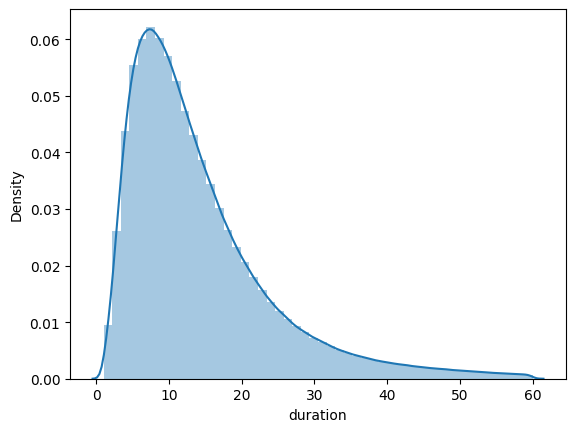

In [75]:
sns.distplot(df_train.duration)

In [82]:
train_dicts=df_train[categorial].to_dict(orient='records')
val_dicts=df_val[categorial].to_dict(orient='records')

In [99]:
dv=DictVectorizer()
X_train=dv.fit_transform(train_dicts)
X_val=dv.transform(val_dicts)

In [100]:
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)

Training set shape: (3009173, 515)
Validation set shape: (2855951, 515)


In [101]:
target='duration'
y_train=df_train[target].values
y_val=df_val[target].values

In [102]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [38]:
y_pred =lr.predict(X_train)

C:\Users\lff\AppData\Local\Temp\ipykernel_20664\3739130919.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
C:\Users\lff\AppData\Local\Temp\ipykernel_20664\3739130919.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train,label='actual')


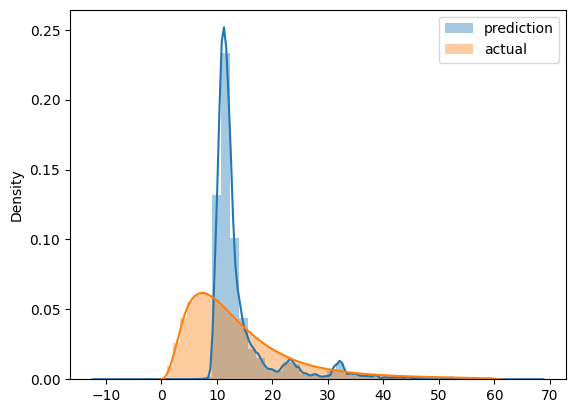

In [89]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train,label='actual')

plt.legend()

In [106]:
MSE=mean_squared_error(y_train,y_pred)
RMSE = np.sqrt(MSE)
print("Training set RMSE:", RMSE)

Training set RMSE: 7.658404649954137


In [104]:
y_val_pred =lr.predict(X_val)

In [107]:
MSE=mean_squared_error(y_val,y_val_pred)
RMSE = np.sqrt(MSE)
print("Validation set RMSE:", RMSE)

Validation set RMSE: 7.8118184763137055
